<img src="Images/logo.png" width="40" /> <font size="+20"> **SARABANDE** </font>

# Application Example

In [1]:
#Preamble
import sarabande
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1 as axgrid
from mpl_toolkits.axes_grid1 import make_axes_locatable
import astropy.io.fits as pyf
import os

plt.style.use("light_mode") #custom matplotlib style sheet

sarabande.about()

-------------------------------
-    Welcome to Sarabande!    -
-------------------------------
Version: 0.0.1-alpha
Authors: J. Sunseri
-------------------------------
Download the latest version from: pending
Report issues to: https://github.com/James11222/sarabande
Read the documentations at: pending
-------------------------------



In order to use SARABANDE on any data, we need to import our data. For this we will pull data from [CATS](https://www.mhdturbulence.com), an open source catalog of Magnetohydrodynamic (MHD) Turbulence simulations. This is currently stored in the `data` folder. We also subtract out the mean from the data set just so we can examine the fluctuations of the density field.

In [2]:
hdulist = pyf.open('data/dens_t800.fits.gz')
data = hdulist[0].data.astype(np.float64)
data = data[:128,:128,:128] # for sake of fast computation
data -= np.mean(data)

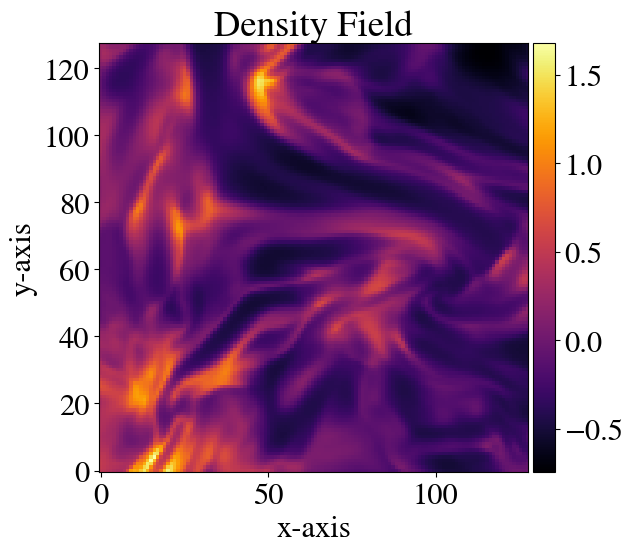

In [3]:
fig, (ax1) = plt.subplots(1,1, figsize=(8,6))
im1 = ax1.imshow(data[:,:,64], cmap='inferno', origin='lower')
divider1 = axgrid.make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im1, cax=cax1)
ax1.set_title("Density Field")
ax1.set_xlabel("x-axis")
ax1.set_ylabel("y-axis")
fig.tight_layout()
plt.show()

From here we can apply SARABANDE to the density field.

### Full 3PCF

In [22]:
#string to directory to save data into
save_dir = os.getcwd() + '/output/'

#create measure_obj
_3PCF = sarabande.measure(nPCF=3, projected=False, density_field_data = data, save_dir=save_dir, save_name='example', nbins=5, ell_max=2)

sarabande.calc_zeta(_3PCF)

Preparing the data:
Creating XYZ Grids for radial bin and ylm creation ... 

Creating radial bins ... 

taking the fourier transform of data ... 

calculating YLM Coefficients ... 

binning spherical harmonics ... 

Binning Spherical Harmonics...
ell, m =  0 0
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
ell, m =  1 0
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
ell, m =  1 1
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
ell, m =  2 0
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
ell, m =  2 1
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
ell, m =  2 2
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
calculating a_lm coefficients ... 


Calculating almb coefficients...

l, m, bin = 0 0 0
l, m, bin = 0 0 1
l, m, bin = 0 0 2
l, m, bin = 0 0 3
l, m, bin = 0 0 4
l, m, bin = 1 0 0
l, m, bin = 1 0 1
l, m, bin = 1 0 2
l, m, bin = 1 0 3
l, m, bin = 1 0 4
l, m, bin = 1 1 0
l, m, bin = 1 1 1
l, m, bin = 1 1 2
l, m, bin = 1 1 3
l, m, bin = 1 1 

Now we can plot the results:

In [29]:
np.shape(_3PCF.zeta.real)

(3, 5, 5)

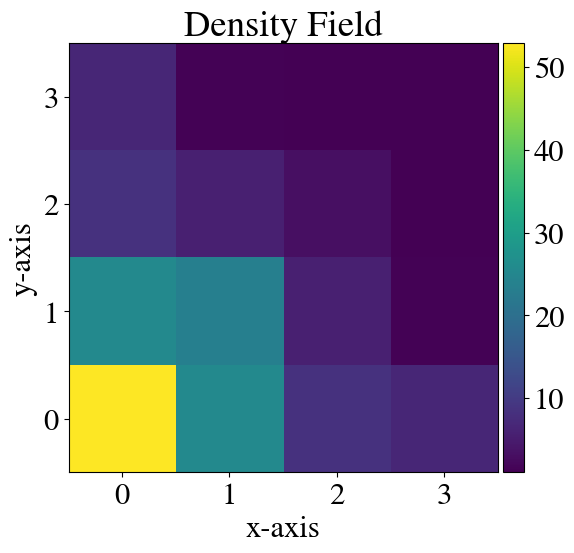

In [61]:
fig, (ax1) = plt.subplots(1,1, figsize=(8,6))
im1 = ax1.imshow(_3PCF.zeta[2,:4,:4].real, origin='lower')
divider1 = axgrid.make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im1, cax=cax1)
ax1.set_title("Density Field")
ax1.set_xlabel("x-axis")
ax1.set_ylabel("y-axis")
fig.tight_layout()
plt.show()

### Full 4PCF

we can also calculate the full 4PCF

In [41]:
#string to directory to save data into
save_dir = os.getcwd() + '/output/'

#create measure_obj
_4PCF = sarabande.measure(nPCF=4, projected=False, density_field_data = data, save_dir=save_dir, save_name='example', nbins=5, ell_max=2)

sarabande.calc_zeta(_4PCF)

Preparing the data:
Creating XYZ Grids for radial bin and ylm creation ... 

Creating radial bins ... 

taking the fourier transform of data ... 

calculating YLM Coefficients ... 

binning spherical harmonics ... 

Binning Spherical Harmonics...
ell, m =  0 0
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
ell, m =  1 0
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
ell, m =  1 1
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
ell, m =  2 0
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
ell, m =  2 1
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
ell, m =  2 2
bin i =  0
bin i =  1
bin i =  2
bin i =  3
bin i =  4
calculating a_lm coefficients ... 


Calculating almb coefficients...

l, m, bin = 0 0 0
l, m, bin = 0 0 1
l, m, bin = 0 0 2
l, m, bin = 0 0 3
l, m, bin = 0 0 4
l, m, bin = 1 0 0
l, m, bin = 1 0 1
l, m, bin = 1 0 2
l, m, bin = 1 0 3
l, m, bin = 1 0 4
l, m, bin = 1 1 0
l, m, bin = 1 1 1
l, m, bin = 1 1 2
l, m, bin = 1 1 3
l, m, bin = 1 1 

In [43]:
np.shape(_4PCF.zeta.real)

(3, 3, 3, 5, 5, 5)

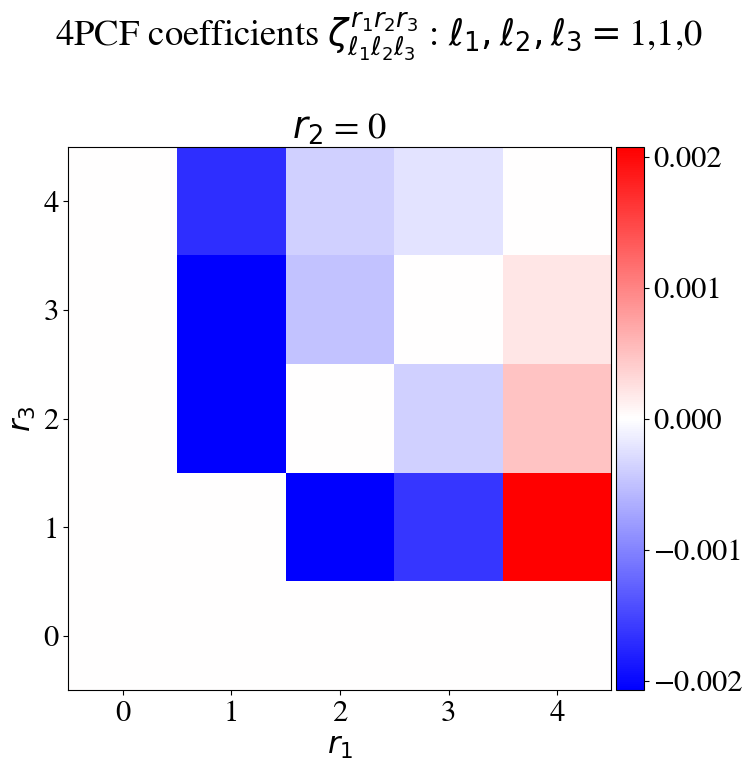

In [55]:
ells = '110'
b_1 = 0
b_2 = 0
b_3 = 0

zeta = _4PCF.zeta[int(ells[0]),int(ells[1]),int(ells[2])]
f, ax1 = plt.subplots(1,1, figsize=(10,8))

ells_string = '$\\ell_1, \ell_2, \ell_3 = $' + ells[0] + ',' + ells[1] + ',' + ells[2]
f.suptitle('4PCF coefficients $\\zeta^{r_1 r_2 r_3}_{\ell_1 \ell_2 \ell_3}$ : ' + ells_string)


im1 = ax1.imshow(zeta[:,b_2,:].real, origin='lower', cmap='bwr')
ax1.set_title('$r_2$ = ' + str(b_2))
ax1.set_xticks(range(5))
ax1.set_yticks(range(5))
ax1.set_xlabel("$r_1$")
ax1.set_ylabel("$r_3$")
divider1 = axgrid.make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im1, cax=cax1)
max_1, min_1 = np.max(zeta[:,b_2,:].real), np.min(zeta[:,b_2,:].real)
im1.set_clim(-max_1, max_1)
f.tight_layout()

## Projected

### Projected 3PCF

In [4]:
#string to directory to save data into
save_dir = os.getcwd() + '/output/'

#create measure_obj
projected_3PCF = sarabande.measure(nPCF=3, projected=True, m_max=5, density_field_data = data[:,:,64], save_dir=save_dir, save_name='example', nbins=20)

sarabande.calc_zeta(projected_3PCF)

Preparing the data:
Creating Radial Bins ... 

Creating kernels ... 

taking the fourier transform of data ... 

calculating C_m Coefficients ... 

Starting Calculation of Projected 3PCF.

Finished Calculating the Projected 3PCF in 0.7281 seconds


In [5]:
np.shape(projected_3PCF.zeta)

(20, 20, 5)

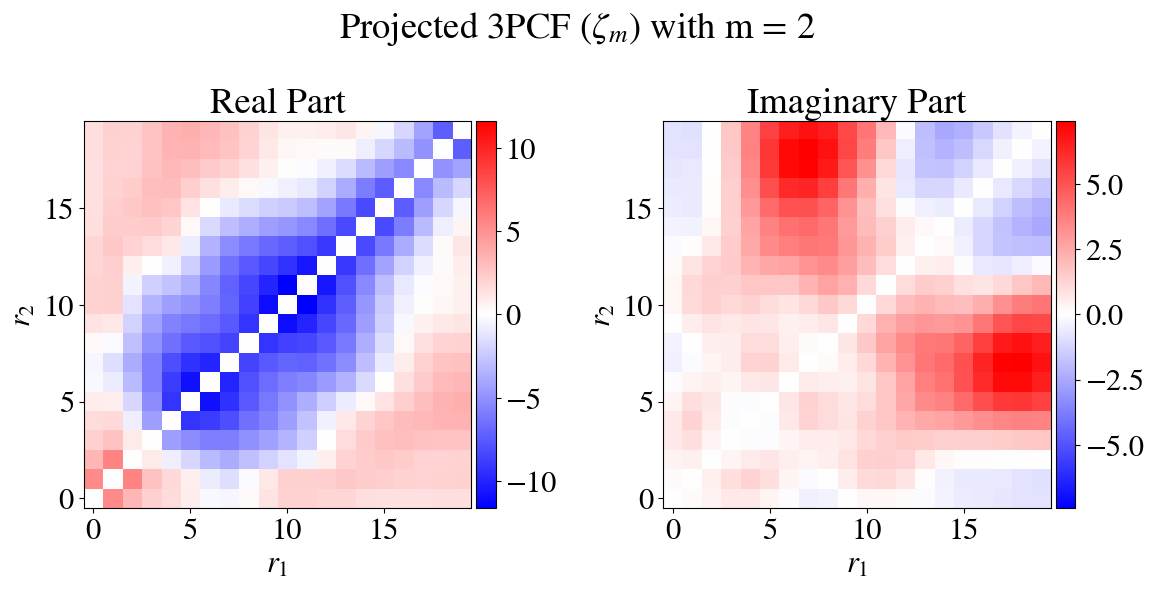

In [6]:
m = 2

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))
fig.suptitle("Projected 3PCF ($\\zeta_m$) with m = {}".format(m))
im1 = ax1.imshow(projected_3PCF.zeta[:,:, m].real, origin='lower', cmap='bwr',vmin= -np.max(np.abs(projected_3PCF.zeta[:,:,m].real)),vmax= np.max(np.abs(projected_3PCF.zeta[:,:,m].real)))
divider1 = axgrid.make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im1, cax=cax1)
ax1.set_title("Real Part")
ax1.set_xlabel("$r_1$")
ax1.set_ylabel("$r_2$")

im2 = ax2.imshow(projected_3PCF.zeta[:,:, m].imag, origin='lower', cmap='bwr',vmin= -np.max(np.abs(projected_3PCF.zeta[:,:,m].imag)),vmax= np.max(np.abs(projected_3PCF.zeta[:,:,m].imag)))
divider2 = axgrid.make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im2, cax=cax2)
ax2.set_title("Imaginary Part")
ax2.set_xlabel("$r_1$")
ax2.set_ylabel("$r_2$")

fig.tight_layout()
plt.show()

### Projected 4PCF

In [7]:
#string to directory to save data into
save_dir = os.getcwd() + '/output/'

#create measure_obj
projected_4PCF = sarabande.measure(nPCF=4, projected=True, m_max=5, density_field_data = data[:,:,64], save_dir=save_dir, save_name='example', nbins=20)

sarabande.calc_zeta(projected_4PCF)

Preparing the data:
Creating Radial Bins ... 

Creating kernels ... 

taking the fourier transform of data ... 

calculating C_m Coefficients ... 


Starting Calculation of Projected 4PCF.

Finished Calculating the Projected 4PCF in 49.8016 seconds


In [8]:
np.shape(projected_4PCF.zeta)

(20, 20, 20, 10, 10)

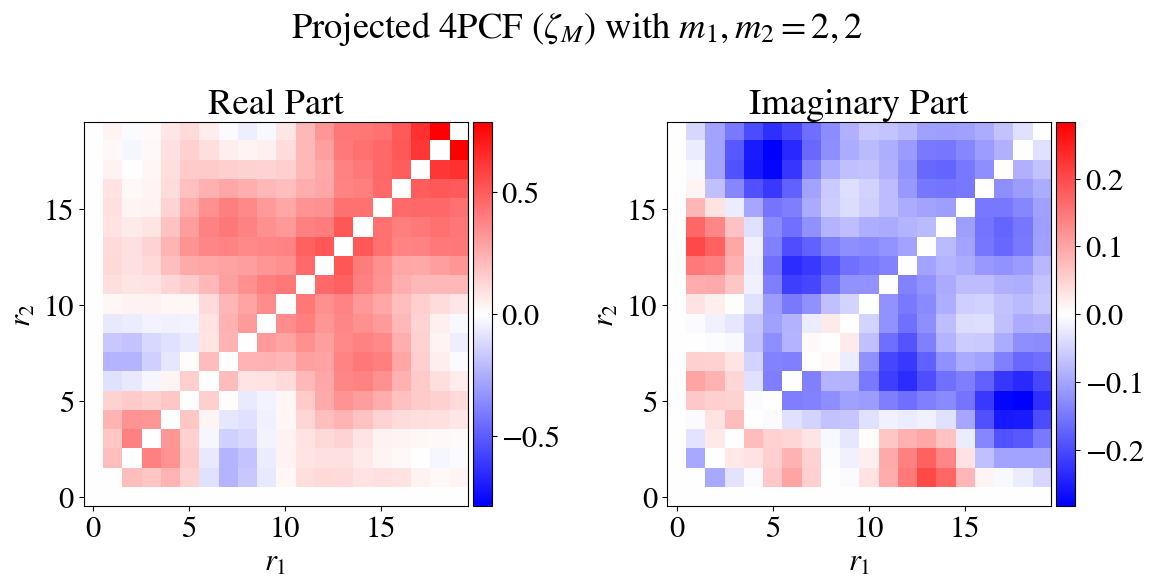

In [18]:
m1 = 2
m2 = 2
b1 = 0
b2 = 0
b3 = 0

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))
fig.suptitle("Projected 4PCF ($\\zeta_M$) with $m_1 ,m_2 = {0}, {1}$".format(m1,m2))
im1 = ax1.imshow(projected_4PCF.zeta[:,:,b3,m1, m2].real, origin='lower', cmap='bwr',vmin= -np.max(np.abs(projected_4PCF.zeta[:,:,b3,m1, m2].real)),vmax= np.max(np.abs(projected_4PCF.zeta[:,:,b3,m1, m2].real)))
divider1 = axgrid.make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im1, cax=cax1)
ax1.set_title("Real Part")
ax1.set_xlabel("$r_1$")
ax1.set_ylabel("$r_2$")

im2 = ax2.imshow(projected_4PCF.zeta[:,:,b3,m1, m2].imag, origin='lower', cmap='bwr',vmin= -np.max(np.abs(projected_4PCF.zeta[:,:,b3,m1, m2].imag)),vmax= np.max(np.abs(projected_4PCF.zeta[:,:,b3,m1, m2].imag)))
divider2 = axgrid.make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im2, cax=cax2)
ax2.set_title("Imaginary Part")
ax2.set_xlabel("$r_1$")
ax2.set_ylabel("$r_2$")

fig.tight_layout()
plt.show()